In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Upload 'pic3.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [3]:
img = cv2.imread("pic3.png")

In [4]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    orig_h,orig_w = img.shape[:2]
    new_w=int(k*orig_w)
    new_h=int(k*orig_h)
    out_img = np.zeros((new_h,new_w,3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            out_img[i,j]=img[int(i/k),int(j/k)]
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [5]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    orig_h,orig_w = img.shape[:2]
    new_h=int(orig_h*k)
    new_w=int(orig_w*k)
    out_img = np.zeros((new_h,new_w,3), dtype=np.uint8)
    rat_x = float(orig_w - 1) / (new_w - 1) 
    rat_y = float(orig_h - 1) / (new_h - 1) 

    for i in range(new_h):
      for j in range(new_w):

         floor_x = int(rat_x * j)
         floor_y = int(rat_y * i)   
         def ceil(a):
            p=a
            p_int = p.is_integer() 
            if(p_int):
             return int(a)
            else:
             return int(a+1)        
         ceil_x = ceil(rat_x * j)
         ceil_y = ceil(rat_y * i)
         wt_x = (rat_x * j) - floor_x
         wt_y = (rat_y * i) - floor_y
         imgv1 = img[floor_y, floor_x]  
         imgv2 = img[ceil_y, floor_x]  
         imgv3 = img[ceil_y, ceil_x] 
         imgv4 = img[floor_y, ceil_x]

         out_img[i,j] = (imgv1*(1-wt_x)*(1-wt_y)) + (imgv2*wt_y*(1-wt_x)) + (imgv3*wt_x*wt_y) + (imgv4*wt_x*(1-wt_y))  

         
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

# Checking the output:

Resize the image by utilizing output1 and output2 in the code block below and plot the original and resized images side by side in both cases.


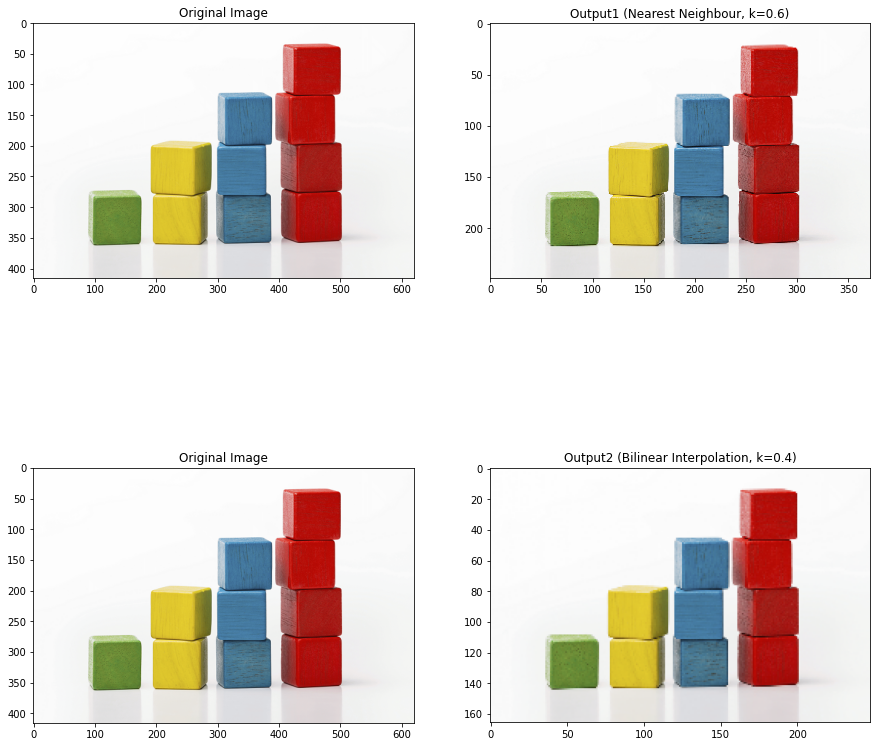

In [6]:
output1 = resize_nn(img, k=0.6)

output2 = resize_bilinear(img, k=0.4) 

#############################
# Start your code from here #
#############################

f, rsmp = plt.subplots(2,2,figsize=(15,15))
rsmp[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
rsmp[0,0].title.set_text('Original Image')
rsmp[0,1].imshow(cv2.cvtColor(output1, cv2.COLOR_BGR2RGB))
rsmp[0,1].title.set_text('Output1 (Nearest Neighbour, k=0.6)')
rsmp[1,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
rsmp[1,0].title.set_text('Original Image')
rsmp[1,1].imshow(cv2.cvtColor(output2, cv2.COLOR_BGR2RGB))
rsmp[1,1].title.set_text('Output2 (Bilinear Interpolation, k=0.4)')

#############################
# End your code here ########
#############################

In [7]:
your_observation = """
1. Nearest Neighbour method used here for resampling factor k=0.6, so Output1 is of size (249 X 372) and Bilinear interpolation method is used for resampling factor k=0.4, 
so Output2 is of size (166 X 248).

2. Bilinear interpolation uses weighted average of 4 nearest neigbours to generate the output. This is the reason output2 has smoother appearance as that of output1.

3. Nearest Neighbour method is most efficient in computation, so small error appears in resampled image. This is the reason output1 has rough, sharp appearance.  

4. Bilinear interpolation introduces new pixel value which is not in the case of Nearest Neighbour method. This is the reason of smoothness of output2.

5. In above image at the edge of each block, Bilinear interpolation provides more satisfactory resampled output as that of Nearest Neighbour method.
"""

print(your_observation)


1. Nearest Neighbour method used here for resampling factor k=0.6, so Output1 is of size (249 X 372) and Bilinear interpolation method is used for resampling factor k=0.4, 
so Output2 is of size (166 X 248).

2. Bilinear interpolation uses weighted average of 4 nearest neigbours to generate the output. This is the reason output2 has smoother appearance as that of output1.

3. Nearest Neighbour method is most efficient in computation, so small error appears in resampled image. This is the reason output1 has rough, sharp appearance.  

4. Bilinear interpolation introduces new pixel value which is not in the case of Nearest Neighbour method. This is the reason of smoothness of output2.

5. In above image at the edge of each block, Bilinear interpolation provides more satisfactory resampled output as that of Nearest Neighbour method.

